# Full DATASET

今までの

In [2]:
from __future__ import print_function

import argparse
import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import numpy as np

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.pool = nn.MaxPool2d(2, stride=2)

        self.conv1 = nn.Conv2d(1,16,2)
        self.conv2 = nn.Conv2d(16,32,2)

        self.fc1 = nn.Linear(1152, 120)
        self.fc2 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.conv1(x)
        x =  F.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        x = x.view(x.size()[0], -1)
        x = self.fc1(x)
        x = self.fc2(x)
        x =torch.softmax(x, dim=1)
        return x

def train_model(net, dataloders_dict, criterion, optimizer, num_epochs):
    
    train_loss_list = []
    train_acc_list = []
    val_loss_list = []
    val_acc_list = []

    #初期設定
    #GPUが使えるか確認
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("使用デバイス", device)
    #モデルをGPUへ
    net.to(device)
    #ネットワークがある程度固定であれば高速化させる
    torch.backends.cudnn.benchmark = True
    #epochのループ
    for epoch in range(num_epochs):
        print('-----------------------------------')
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-----------------------------------')

        #epochごとの学習と検証のループ
        for phase in ['train', 'val']:
            if phase == 'train':
                net.train() #モデルを訓練モードに
            else:
                net.eval() #モデルを検証モードに
            epoch_loss = 0.0 #epochの損失0
            epoch_corrects = 0 #epochの正解数
            #データローダーからミニバッチを取り出すループ
            for inputs, labels in tqdm.tqdm(dataloders_dict[phase]):
                #optimizerを初期化
                optimizer.zero_grad()
                #順伝搬(forward)計算
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = net(inputs)
                    loss = criterion(outputs, labels)#損失を計算
                    _, preds = torch.max(outputs, 1) #ラベルを予測
                    #訓練時はバックプロパゲーション
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                    #イテレーション結果の計算
                    #lossの合計を更新
                    epoch_loss += loss.item() * inputs.size(0)
                    #正解の合計数を更新
                    epoch_corrects += torch.sum(preds == labels.data)
            #epochごとのlossと正解率を表示
            epoch_loss = epoch_loss / len(dataloders_dict[phase].dataset)
            epoch_acc = epoch_corrects.double() / len(dataloders_dict[phase].dataset)
            print('{} Loss:{:.4f} Acc: {:.4f}'.format(phase, epoch_loss,epoch_acc))
            if phase == 'train':
                train_acc_list.append(epoch_acc)
                train_loss_list.append(epoch_loss)
            else:
                val_acc_list.append(epoch_acc)
                val_loss_list.append(epoch_loss)
    return val_loss_list,train_loss_list, val_acc_list, train_acc_list

import random
seed = 42
random.seed(seed)  
np.random.seed(seed)  
# PyTorch のRNGを初期化  
torch.manual_seed(seed)

import tensorflow as tf
import torch.utils.data as data
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 1, 28, 28).astype('float32')
x_test = x_test.reshape(10000, 1, 28, 28).astype('float32')

# 正規化
x_train /= 255
x_test /= 255


    
y_train = y_train.astype('long')
y_test = y_test.astype('long')

ds_train = data.TensorDataset(torch.from_numpy(x_train), torch.from_numpy(y_train))
ds_test  = data.TensorDataset(torch.from_numpy(x_test), torch.from_numpy(y_test))

train_loader = data.DataLoader(dataset=ds_train, batch_size=1024, shuffle=True, num_workers=4)
test_loader = data.DataLoader(dataset=ds_test, batch_size=1024, shuffle=False)

dataloders_dict = {"train": train_loader, "val": test_loader}

model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.006)

val_loss, train_loss, val_acc, train_acc = train_model(model, dataloders_dict, criterion, optimizer, num_epochs=5)
torch.save(model.state_dict(), "mnist_cnn.pth")

  0%|          | 0/59 [00:00<?, ?it/s]

使用デバイス cpu
-----------------------------------
Epoch 1/5
-----------------------------------


  0%|          | 0/10 [00:00<?, ?it/s]

train Loss:1.7149 Acc: 0.7527


  0%|          | 0/59 [00:00<?, ?it/s]

val Loss:1.5343 Acc: 0.9323
-----------------------------------
Epoch 2/5
-----------------------------------


 10%|█         | 1/10 [00:00<00:01,  5.32it/s]

train Loss:1.5157 Acc: 0.9487


  0%|          | 0/59 [00:00<?, ?it/s]

val Loss:1.4992 Acc: 0.9651
-----------------------------------
Epoch 3/5
-----------------------------------


  0%|          | 0/10 [00:00<?, ?it/s]

train Loss:1.4963 Acc: 0.9667


  0%|          | 0/59 [00:00<?, ?it/s]

val Loss:1.4889 Acc: 0.9736
-----------------------------------
Epoch 4/5
-----------------------------------


  0%|          | 0/10 [00:00<?, ?it/s]

train Loss:1.4899 Acc: 0.9728


  0%|          | 0/59 [00:00<?, ?it/s]

val Loss:1.4866 Acc: 0.9753
-----------------------------------
Epoch 5/5
-----------------------------------


  0%|          | 0/10 [00:00<?, ?it/s]

train Loss:1.4846 Acc: 0.9778


100%|██████████| 10/10 [00:02<00:00,  5.34it/s]


val Loss:1.4827 Acc: 0.9796


学習できました。
では、学習結果を可視化してみましょう。

# 学習可視化

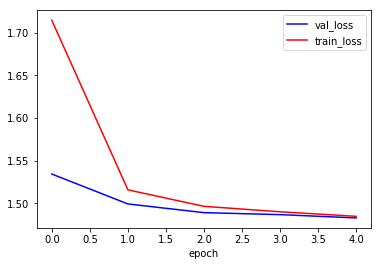

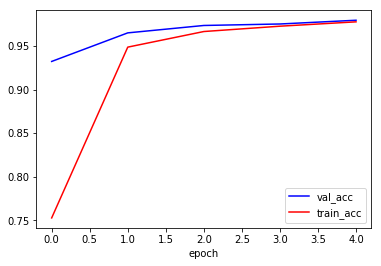

In [4]:
import matplotlib.pyplot as plt
#学習結果plot
plt.figure()
plt.plot(range(5), val_loss, 'b-', label='val_loss')
plt.plot(range(5), train_loss, 'r-', label='train_loss')
plt.legend()
plt.xlabel('epoch')
plt.show()

plt.figure()
plt.plot(range(5), val_acc, 'b-', label='val_acc')
plt.plot(range(5), train_acc, 'r-', label='train_acc')
plt.legend()
plt.xlabel('epoch')
plt.show()

今までで一番精度はいいですね。
では、未知のデータで推論を行ってみましょう。

# 未知のデータで推論


label6 predict1, 0.6005750298500061
label5 predict5, 1.0
label2 predict2, 1.0
label7 predict7, 0.9999793767929077
label4 predict4, 1.0
label3 predict3, 1.0
label1 predict6, 0.9999990463256836
label9 predict1, 0.9439806938171387
label8 predict3, 0.9999994039535522


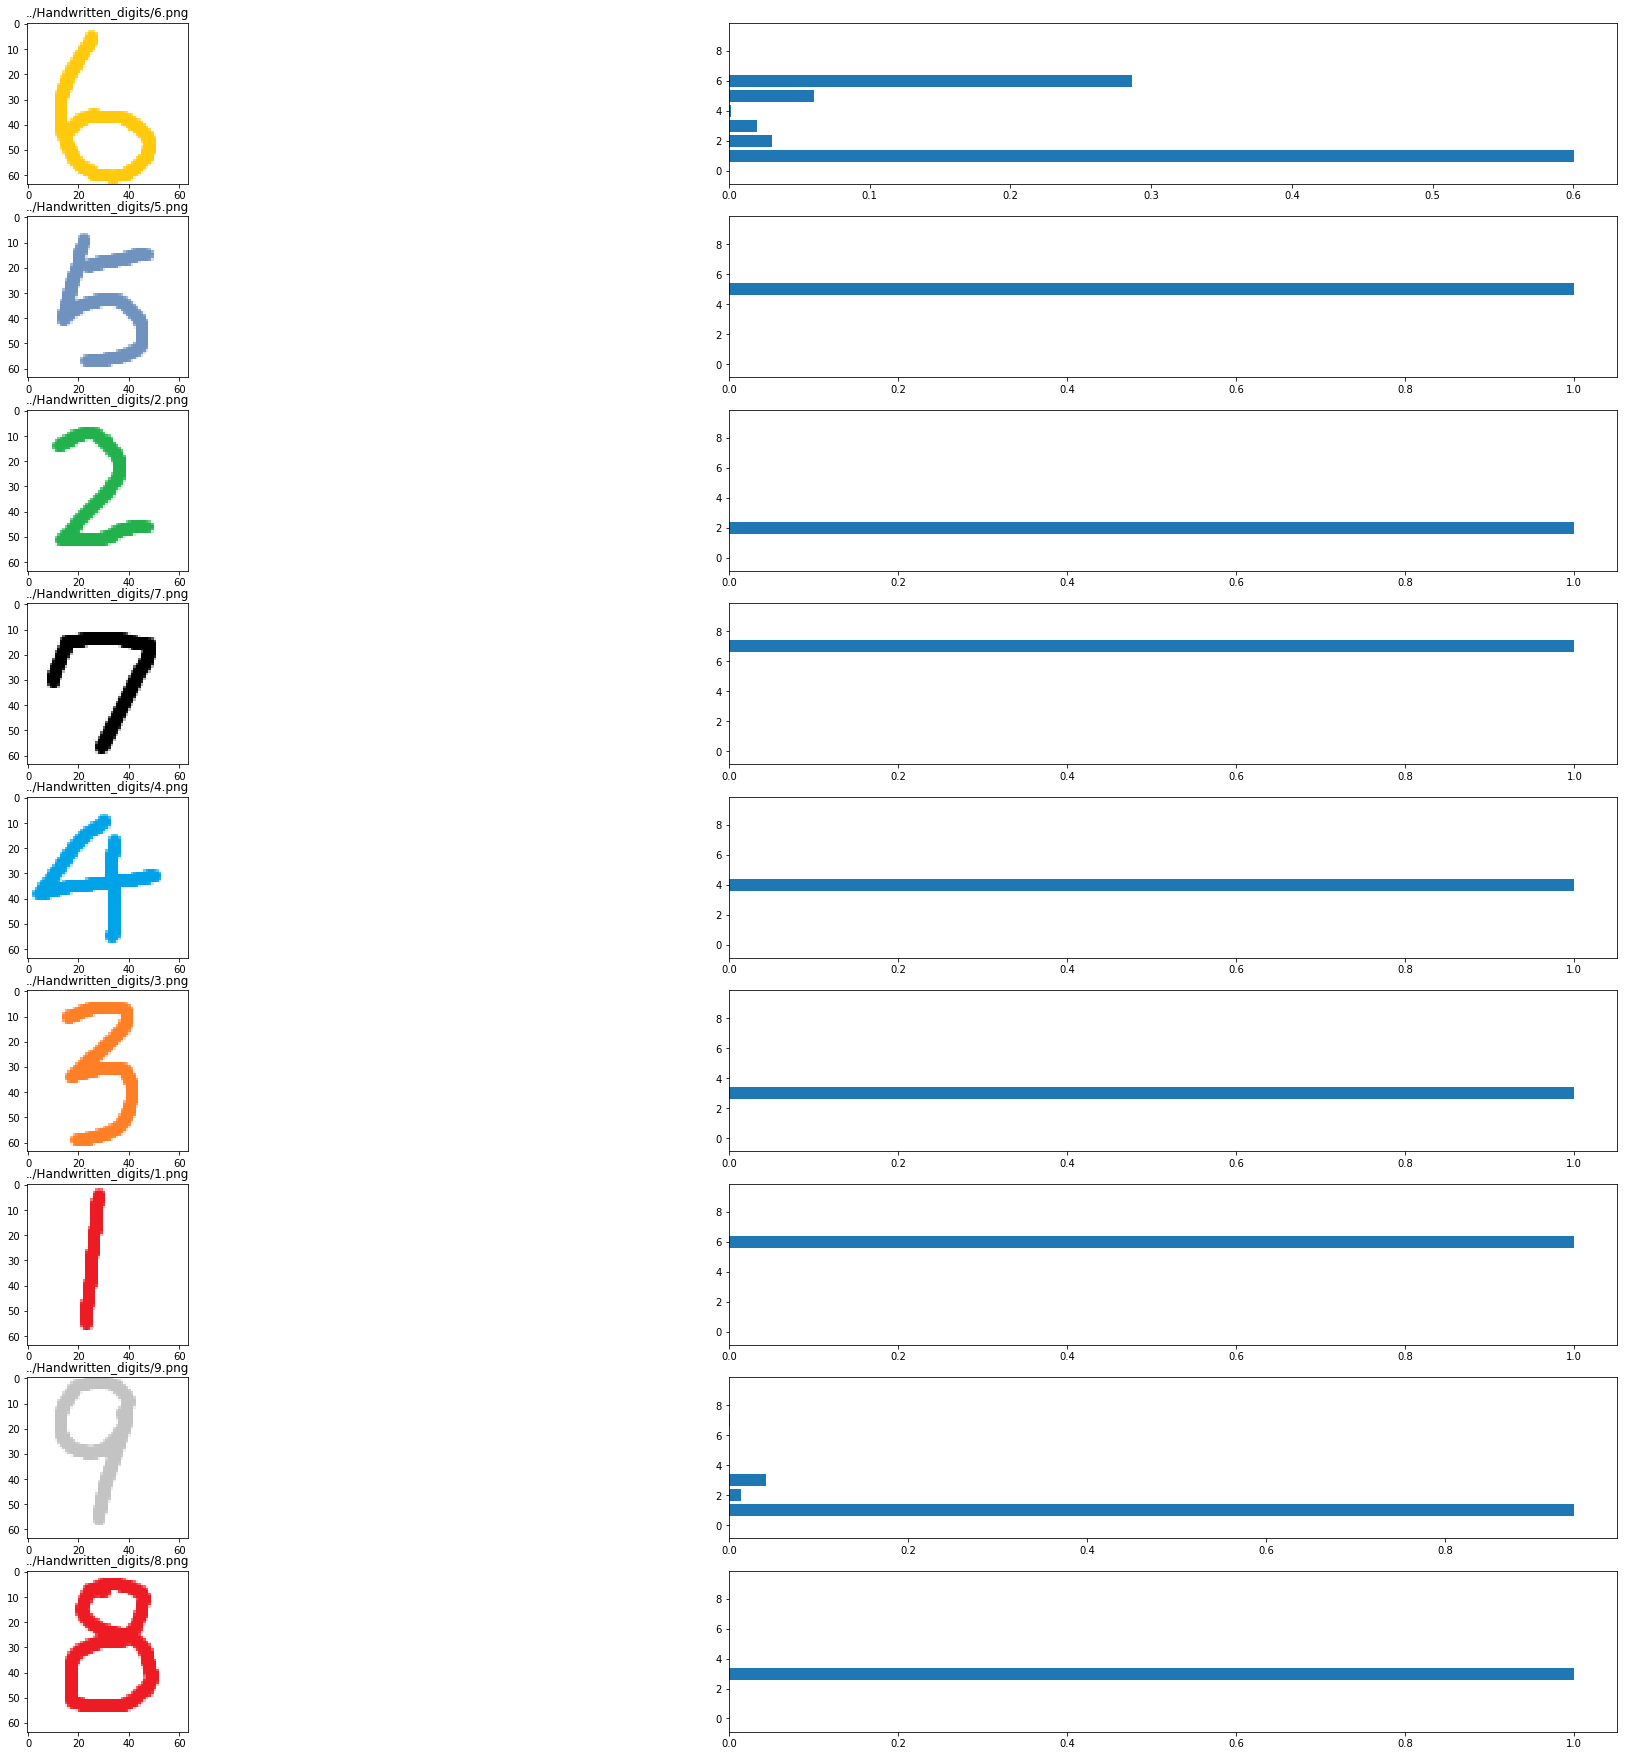

In [5]:
import  glob
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import torch 

num_list = glob.glob("../Handwritten_digits/*")
param = torch.load('./mnist_cnn.pth')
model = Net()
model.load_state_dict(param)
model.eval()

print()
result_list = []
fig = plt.figure(figsize=(35,35))
i = 0
for v in num_list:
    image = Image.open(v)
    ax = fig.add_subplot(10, 2, i + 1)
    ax.imshow(np.array(image))
    ax.set_title(v)
    # PyTorchで扱えるように変換(リサイズ、白黒反転、正規化、次元追加)
    image = ImageOps.invert(image.convert("L")).resize((28, 28))
    transform = transforms.Compose(
        [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
    )
    image = transform(image).unsqueeze(0)
    # 予測を実施
    output = model(image)
    
    ax = fig.add_subplot(10, 2, i + 2)
    ax.barh(range(10), output.detach().numpy().tolist()[0])
    _, prediction = torch.max(output, 1)
    result = prediction[0].item()
    i += 2
    print("label{} predict{}, {}".format(v[-5:-4], result,output.detach().numpy().tolist()[0][result]))

結果はSTEP2と同じでした。